In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.cluster import KMeans   # For K-Means clustering
from sklearn.metrics import silhouette_samples, silhouette_score   # For Silhouette analysis
from sklearn.metrics import pairwise_distances   # To calculate total within-cluster distance
import warnings

In [5]:
# Import Data
path = r'/Users/vineetasinha/Documents/Backups/Apr30/dataanalytics/tasks/Data-Immersion/Achievement 6/World Happiness Project'

In [6]:
df = pd.read_csv(os.path.join(path,'Data','Cleaned Data','FinalWHData.csv'))

In [7]:
df.describe()

,Unnamed: 0,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754781,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,0.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,78.500000,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,117.750000,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,157.000000,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [8]:
df = df.drop(columns=['Unnamed: 0'])


In [9]:
df.head(5)

,Country,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [10]:
# Removing categorical columns
df.columns

Index(['Country', 'Overall Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Life Expectancy',
       'Freedom to make life choices', 'Absence of Corruption', 'Generosity'],
      dtype='object')

In [11]:
var_to_include = ['Happiness Score','Economy (GDP per Capita)', 'Life Expectancy', 'Freedom to make life choices', 'Absence of Corruption', 'Generosity']

In [12]:
df_sub = df[var_to_include]

In [13]:
df_sub.shape

(158, 6)

In [14]:
# Define a standard scaler object

scaler = StandardScaler()

In [15]:
df_scaled = scaler.fit_transform(df_sub)

In [16]:
df_scaled

array([[ 1.93736005e+00,  1.36962124e+00,  1.26340809e+00,
         1.57743784e+00,  2.30965159e+00,  4.71039706e-01],
       [ 1.91458063e+00,  1.13522625e+00,  1.28943383e+00,
         1.33245589e+00, -1.64795307e-02,  1.57585637e+00],
       [ 1.88479215e+00,  1.19286069e+00,  9.92228817e-01,
         1.46965910e+00,  2.84277380e+00,  8.24292797e-01],
       [ 1.88041149e+00,  1.52512972e+00,  1.03514490e+00,
         1.60513145e+00,  1.85208080e+00,  8.68637502e-01],
       [ 1.79717898e+00,  1.19487640e+00,  1.11805373e+00,
         1.36041579e+00,  1.55572536e+00,  1.74856316e+00],
       [ 1.77878022e+00,  1.10518965e+00,  1.05097959e+00,
         1.41846586e+00,  2.25900540e+00, -2.99762791e-02],
       [ 1.75424853e+00,  1.20271529e+00,  1.06612405e+00,
         1.24584679e+00,  1.46019962e+00,  1.89102052e+00],
       [ 1.74198268e+00,  1.20836426e+00,  1.13932906e+00,
         1.53902627e+00,  2.46560175e+00,  9.92406743e-01],
       [ 1.67364441e+00,  1.00547410e+00,  1.129

In [17]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

Text(0, 0.5, 'Score')

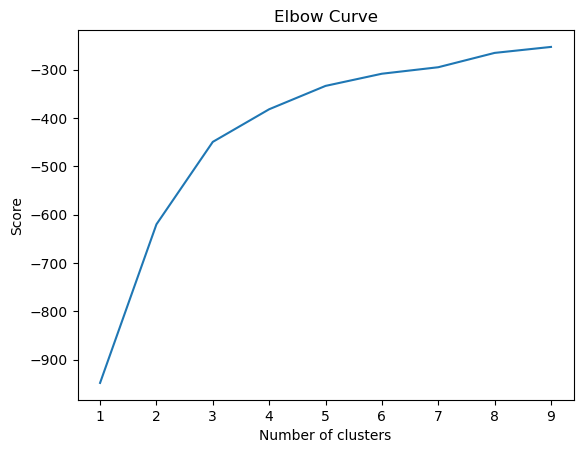

In [18]:
plt.plot(num_cl, score)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

In [19]:
kmeans = KMeans(n_clusters = 2) 

In [20]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

In [21]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs.
df['clusters'] = kmeans.labels_

In [22]:
df.head()

,Country,Overall Rank,Happiness Score,Economy (GDP per Capita),Family,Life Expectancy,Freedom to make life choices,Absence of Corruption,Generosity,clusters
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [23]:
df['clusters'].value_counts(dropna = False)

clusters
1    89
0    69
Name: count, dtype: int64

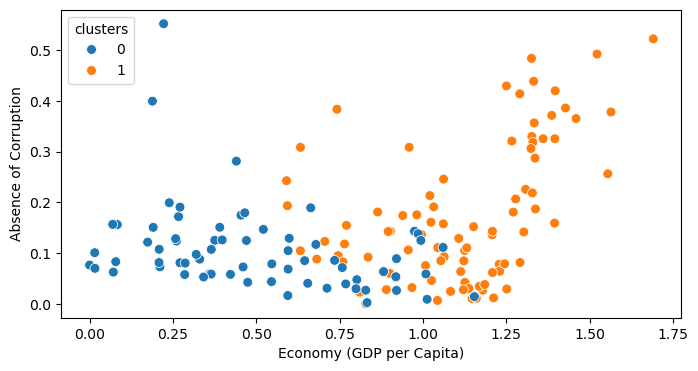

In [24]:
# Plot the clusters for the "Economy (GDP per Capita)" and "Absence of Corruption" variables.

plt.figure(figsize = (8, 4))
ax = sns.scatterplot(x = df['Economy (GDP per Capita)'], y = df['Absence of Corruption'], 
                     hue = df['clusters'], s = 50) 
# 's' represents the size of the points you want to see in the plot.

#ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Absence of Corruption') # Label y-axis.
plt.show()

In [25]:
# Cluster 0 (Blue): These countries might be characterized by lower economic development and higher corruption levels. This cluster shows a weaker correlation between economic development and absence of corruption.
# Cluster 1 (Orange): These countries generally have higher economic development and better corruption control. This cluster shows a clearer positive correlation between economic development and absence of corruption.

In [26]:
# The scatter plot reveals important insights into the relationship between economic development and corruption control across different clusters of countries. It suggests a positive correlation between GDP per capita and absence of corruption, particularly for more developed economies. 

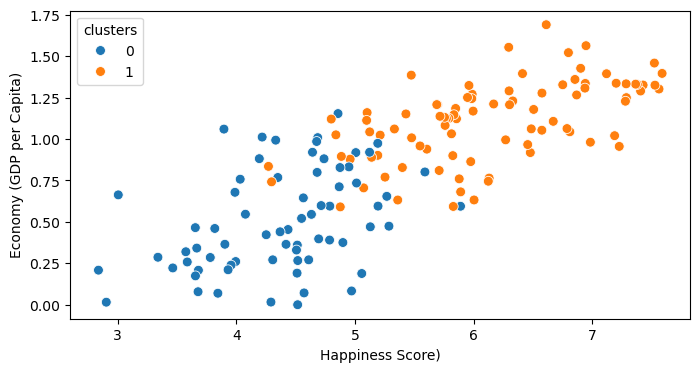

In [27]:
# Plot the clusters for the "Economy (GDP per Capita)" and "Happiness Score" variables.

plt.figure(figsize = (8, 4))
ax = sns.scatterplot(x = df['Happiness Score'], y = df['Economy (GDP per Capita)'], 
                     hue = df['clusters'], s = 50) 
# 's' represents the size of the points you want to see in the plot.

#ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score)') # Label x-axis.
plt.ylabel('Economy (GDP per Capita)') # Label y-axis.
plt.show()

In [28]:
# Cluster 0 (Blue): These countries might be characterized by lower economic development and lower happiness scores. 
# This cluster shows a broader range of GDP per capita and happiness scores but generally occupies the lower end of both metrics.
# Cluster 1 (Orange): These countries generally have higher economic development and higher happiness scores. 
# This cluster shows a clearer and stronger positive correlation between economic development and happiness.

In [29]:
# The scatter plot reveals a significant positive 
# relationship between economic development (GDP per capita) and happiness scores, 
# particularly evident in Cluster 1. Countries with higher GDP per capita tend to report higher happiness scores. 

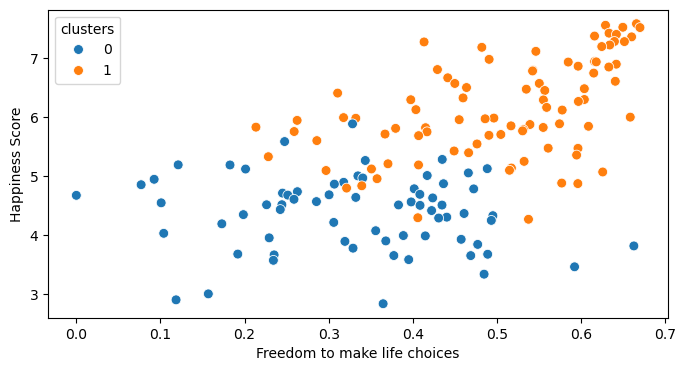

In [30]:
# Plot the clusters for the "Happiness Score" and "Freedom to make life choices"
plt.figure(figsize = (8, 4))
ax = sns.scatterplot(x = df['Freedom to make life choices'], y = df['Happiness Score'], 
                     hue = df['clusters'], s = 50) 
# 's' represents the size of the points you want to see in the plot.

#ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom to make life choices') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

In [31]:
# Cluster 0 (Blue): These countries might be characterized by lower levels of freedom to make life choices and lower happiness scores. This cluster shows a broader range of freedom and happiness scores but generally occupies the lower end of both metrics.
# Cluster 1 (Orange): These countries generally have higher levels of freedom to make life choices and higher happiness scores. This cluster shows a clearer and stronger positive correlation between freedom and happiness.

In [32]:
# The scatter plot reveals a significant positive relationship between the freedom to make life choices and happiness scores, particularly evident in Cluster 1. Countries with higher levels of individual freedom tend to report higher happiness scores.

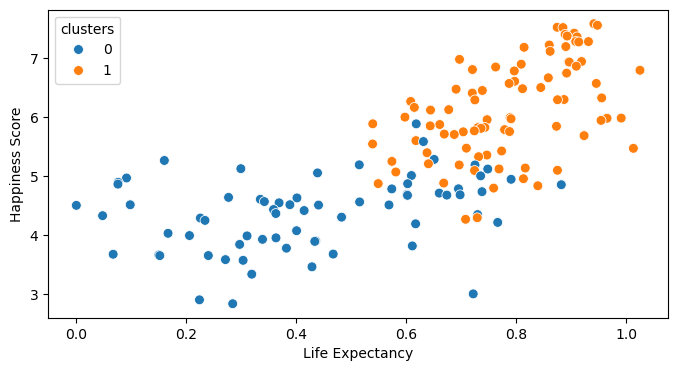

In [33]:
# Plot the clusters for the "Happiness Score" and "Life Expectancy"
plt.figure(figsize = (8, 4))
ax = sns.scatterplot(x = df['Life Expectancy'], y = df['Happiness Score'], 
                     hue = df['clusters'], s = 50) 
# 's' represents the size of the points you want to see in the plot.

#ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

In [34]:
# Cluster 0 (Blue): This cluster generally has higher life expectancy and happiness scores.
# Cluster 1 (Orange): This cluster generally has lower life expectancy and happiness scores.

In [35]:
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'

In [36]:
df.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                            'Economy (GDP per Capita)':['mean', 'median'], 
                            'Absence of Corruption':['mean', 'median'],
                            'Freedom to make life choices':['mean', 'median'], 
                            'Life Expectancy':['mean', 'median']})

Happiness Score        Economy (GDP per Capita)           \
                   mean median                     mean   median   
cluster                                                            
blue           4.384304  4.512                 0.505666  0.46038   
orange         6.144371  5.995                 1.110098  1.12555   

        Absence of Corruption          Freedom to make life choices           \
                         mean   median                         mean   median   
cluster                                                                        
blue                 0.105201  0.08492                     0.331043  0.34037   
orange               0.173053  0.14145                     0.504261  0.53206   

        Life Expectancy           
                   mean   median  
cluster                           
blue           0.426689  0.40132  
orange         0.788084  0.78805

In [75]:
# Analyze the role of GDP per capita, absence of corruption, freedom to make life choices, and life expectancy in influencing overall happiness.
# Recommend specific interventions to increase GDP per capita, reduce corruption, enhance personal freedom, and improve life expectancy.
# Prioritize investments in areas that significantly impact happiness and well-being.
# Implement specific programs to address the weaknesses identified in the orange cluster, such as low GDP per capita or high corruption levels.
# Conduct qualitative studies to complement the quantitative data and provide a more comprehensive understanding of the factors influencing happiness and well-being.


In [77]:
df.to_pickle(os.path.join(path,'Data', 'Cleaned Data', 'FinalWHData.pkl'))